In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

from collections import Counter

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [5]:
data = pd.read_csv(r"Movie.csv", lineterminator="\n")

In [6]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [8]:
data.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [9]:
data.describe(include="all")

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
count,9827,9827,9827,9827.000000,9827.000000,9827.000000,9827,9827,9827
unique,5893,9513,9822,NaN,NaN,NaN,43,2337,9827
top,2022-03-10,Beauty and the Beast,Wilbur the pig is scared of the end of the sea...,NaN,NaN,NaN,en,Drama,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
freq,16,4,2,NaN,NaN,NaN,7570,466,1
mean,NaN,NaN,NaN,40.326088,1392.805536,6.439534,NaN,NaN,NaN
std,NaN,NaN,NaN,108.873998,2611.206907,1.129759,NaN,NaN,NaN
min,NaN,NaN,NaN,13.354000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,16.128500,146.000000,5.900000,NaN,NaN,NaN
50%,NaN,NaN,NaN,21.199000,444.000000,6.500000,NaN,NaN,NaN
75%,NaN,NaN,NaN,35.191500,1376.000000,7.100000,NaN,NaN,NaN


In [10]:
df = data.drop(columns=["Overview", "Poster_Url"])

In [11]:
df.describe(include="all")

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
count,9827,9827,9827.000000,9827.000000,9827.000000,9827,9827
unique,5893,9513,NaN,NaN,NaN,43,2337
top,2022-03-10,Beauty and the Beast,NaN,NaN,NaN,en,Drama
freq,16,4,NaN,NaN,NaN,7570,466
mean,NaN,NaN,40.326088,1392.805536,6.439534,NaN,NaN
std,NaN,NaN,108.873998,2611.206907,1.129759,NaN,NaN
min,NaN,NaN,13.354000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,16.128500,146.000000,5.900000,NaN,NaN
50%,NaN,NaN,21.199000,444.000000,6.500000,NaN,NaN
75%,NaN,NaN,35.191500,1376.000000,7.100000,NaN,NaN


In [12]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,en,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,en,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War"


# Notes

- Trivial columns: `Overview`, `Poster-Url`
- **The dataset is ordered based on the popularity**


# Release_Date


In [13]:
df["Release_Date"].value_counts().head(10)

Release_Date
2022-03-10    16
2022-03-09    15
2021-10-08    13
2021-02-12    13
2021-07-23    11
2021-10-01    11
2021-11-12    10
2021-12-03    10
2021-09-03     9
2022-03-11     9
Name: count, dtype: int64

In [14]:
df["Year"] = df["Release_Date"].str.extract(r"(\d{4})").astype(int)
df["Year"].value_counts()

Year
2021    714
2018    530
2017    510
2019    500
2016    470
       ... 
1902      1
1920      1
2024      1
1929      1
1930      1
Name: count, Length: 102, dtype: int64

In [15]:
df.drop(columns=["Release_Date"], inplace=True)

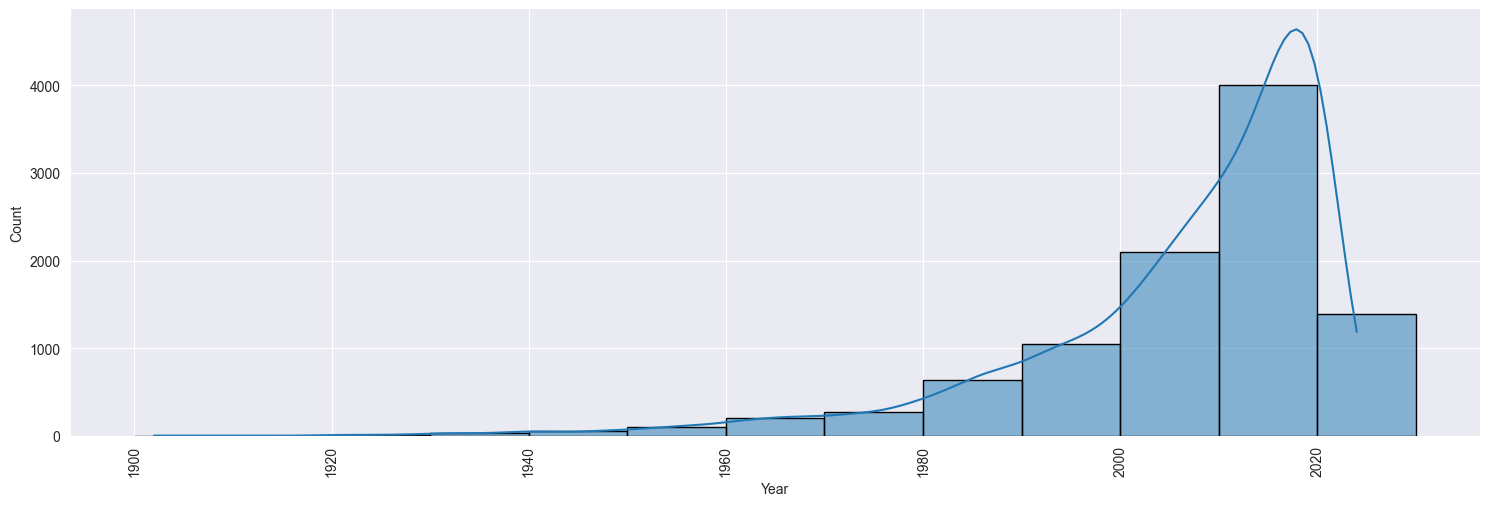

In [16]:
sns.displot(
    data=df,
    x="Year",
    kind="hist",
    aspect=3,
    binrange=(1900, 2030),
    bins=13,
    kde=True,
    edgecolor="black",
)
plt.xticks(rotation=90)
plt.show()

_`2021` is the year with most film production and `2010-2020` is the most productive decade_


# Title


# Popularity


In [17]:
# the most popular movies
df[["Title", "Popularity", "Year"]].head(10)  # type: ignore

,Title,Popularity,Year
0,Spider-Man: No Way Home,5083.954,2021
1,The Batman,3827.658,2022
2,No Exit,2618.087,2022
3,Encanto,2402.201,2021
4,The King's Man,1895.511,2021
5,The Commando,1750.484,2022
6,Scream,1675.161,2022
7,Kimi,1601.782,2022
8,Fistful of Vengeance,1594.013,2022
9,Eternals,1537.406,2021


In [18]:
filt = df["Popularity"] > 1000
most_pop = df.loc[filt, ["Title", "Popularity"]]  # type: ignore
most_pop

,Title,Popularity
0,Spider-Man: No Way Home,5083.954
1,The Batman,3827.658
2,No Exit,2618.087
3,Encanto,2402.201
4,The King's Man,1895.511
5,The Commando,1750.484
6,Scream,1675.161
7,Kimi,1601.782
8,Fistful of Vengeance,1594.013
9,Eternals,1537.406


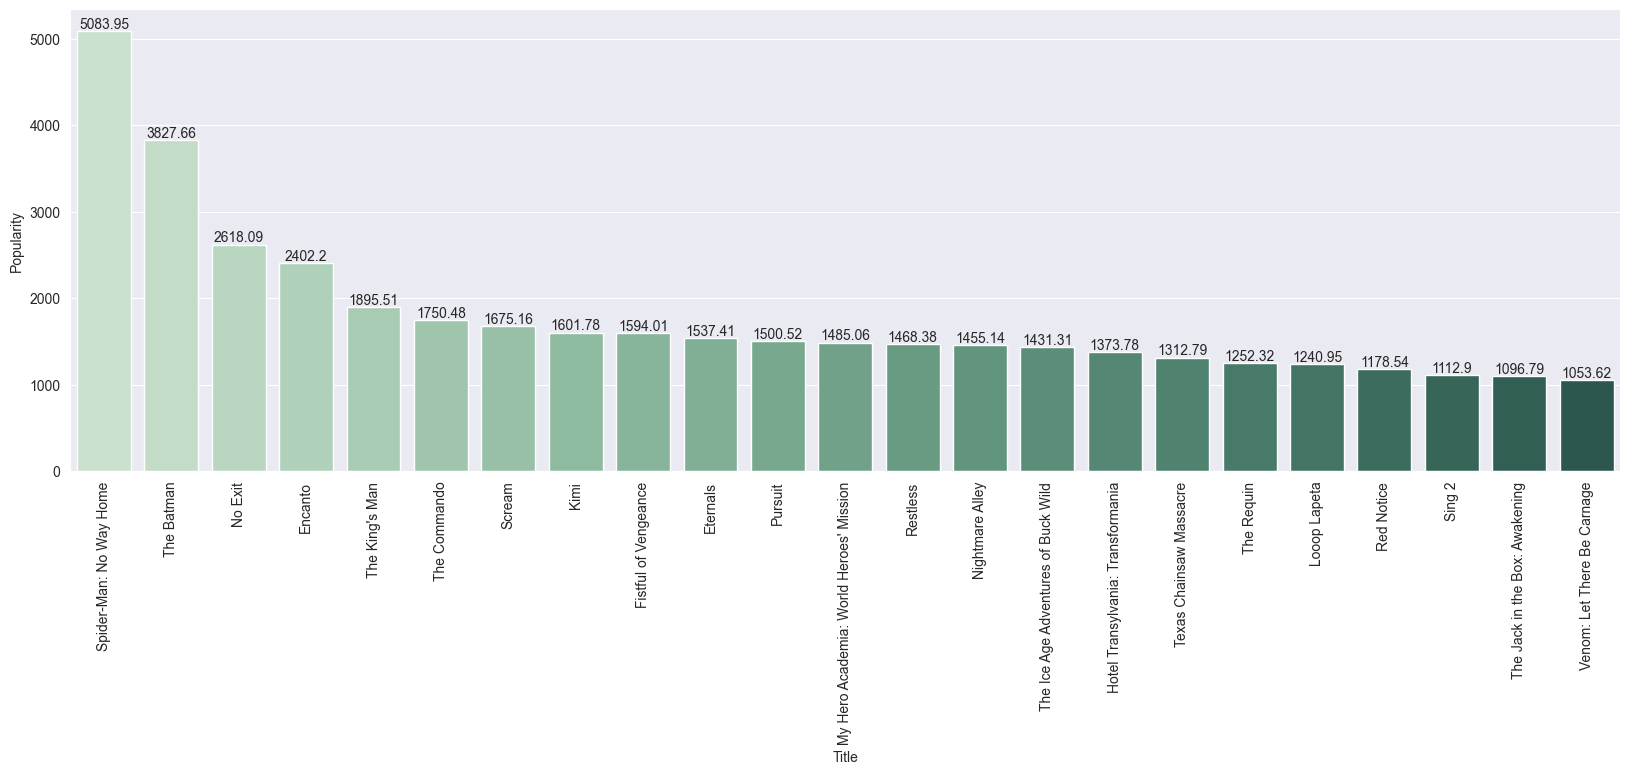

[<BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>,
 <BarContainer object of 1 artists>]

In [19]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(
    data=most_pop,
    x="Title",
    y="Popularity",
    palette="ch:2.5,-.2,dark=.3",
)
for container in ax.containers:
    ax.bar_label(container, fontsize=10)
plt.xticks(rotation=90)
plt.show()
ax.containers

_They are all new films_


In [20]:
least_pop = df[["Title", "Popularity"]].tail(20)  # type: ignore

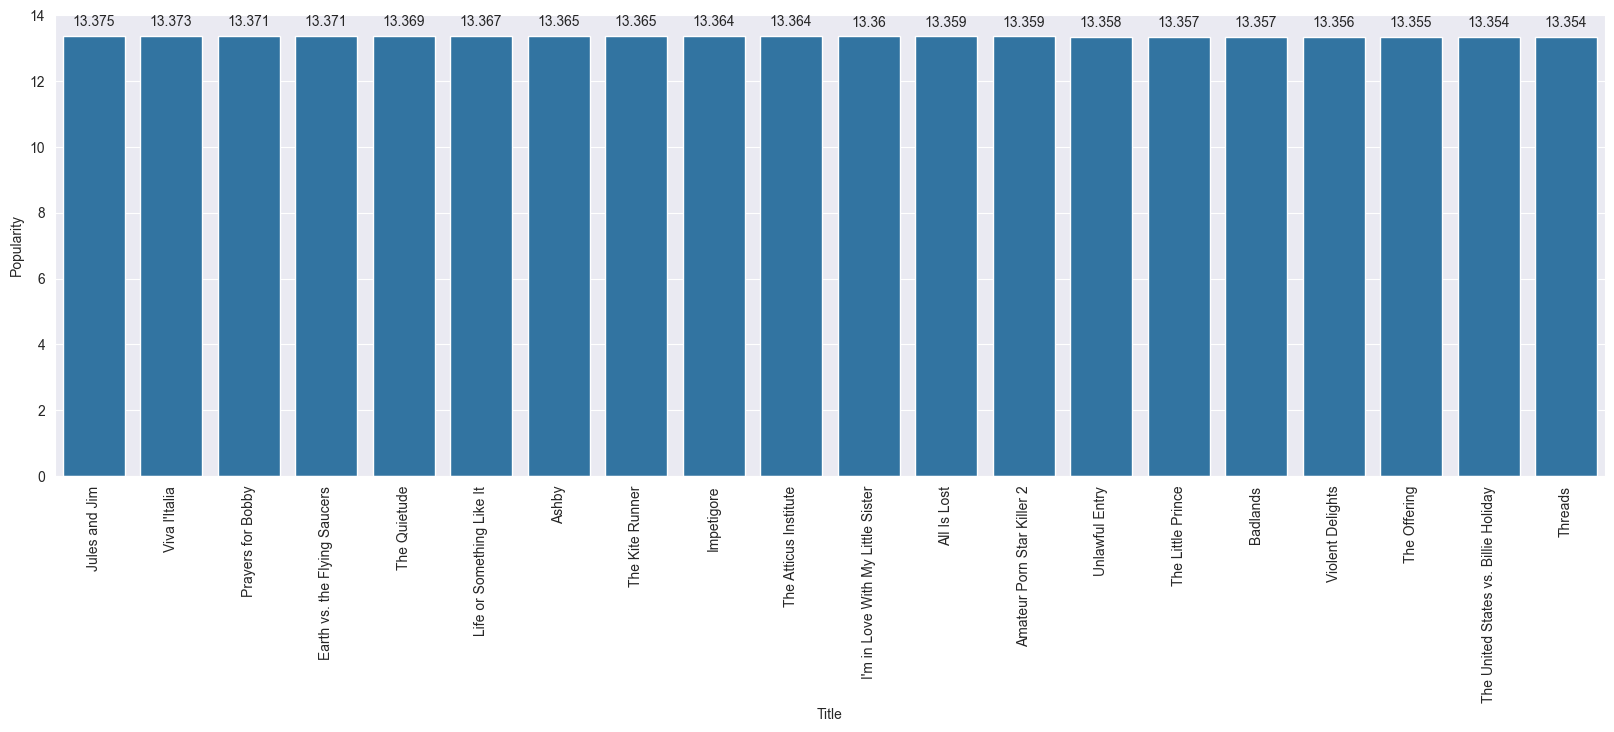

In [21]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(
    x=least_pop["Title"],
    y=least_pop["Popularity"],
)
plt.xticks(rotation=90)
# Annotate each bar with its value
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{height}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),  # 3 points vertical offset
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

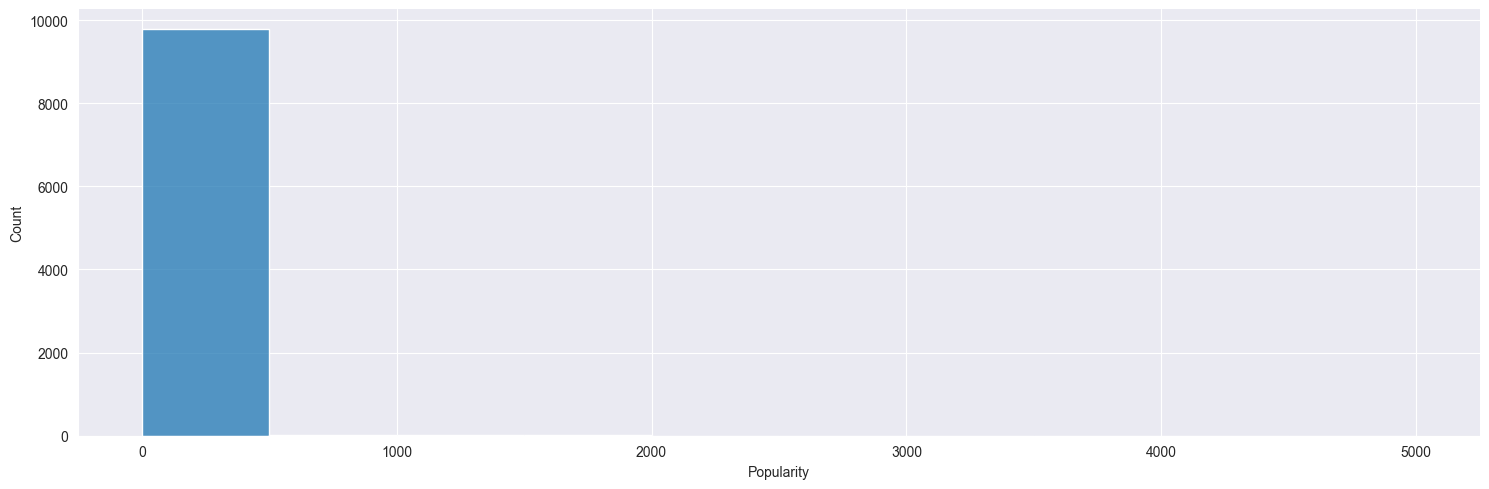

In [22]:
sns.displot(x="Popularity", data=df, kind="hist", aspect=3, bins=10, binrange=(0, 5000))

<Axes: xlabel='Year', ylabel='Popularity'>

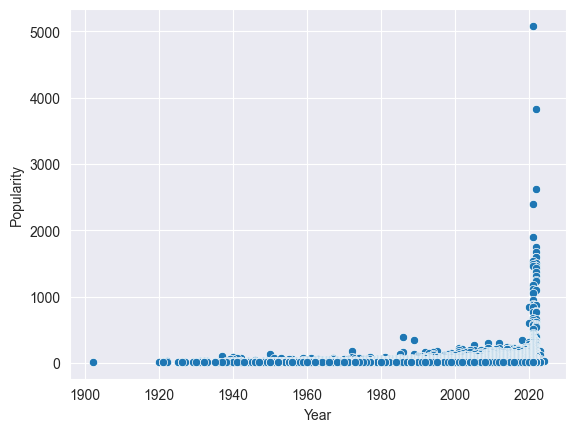

In [23]:
sns.scatterplot(x="Year", y="Popularity", data=df)

- Almost all films have`0-500` popularity rate (so many films have outstanding rates)
- All films with high population are recent films `2018 - 2024`


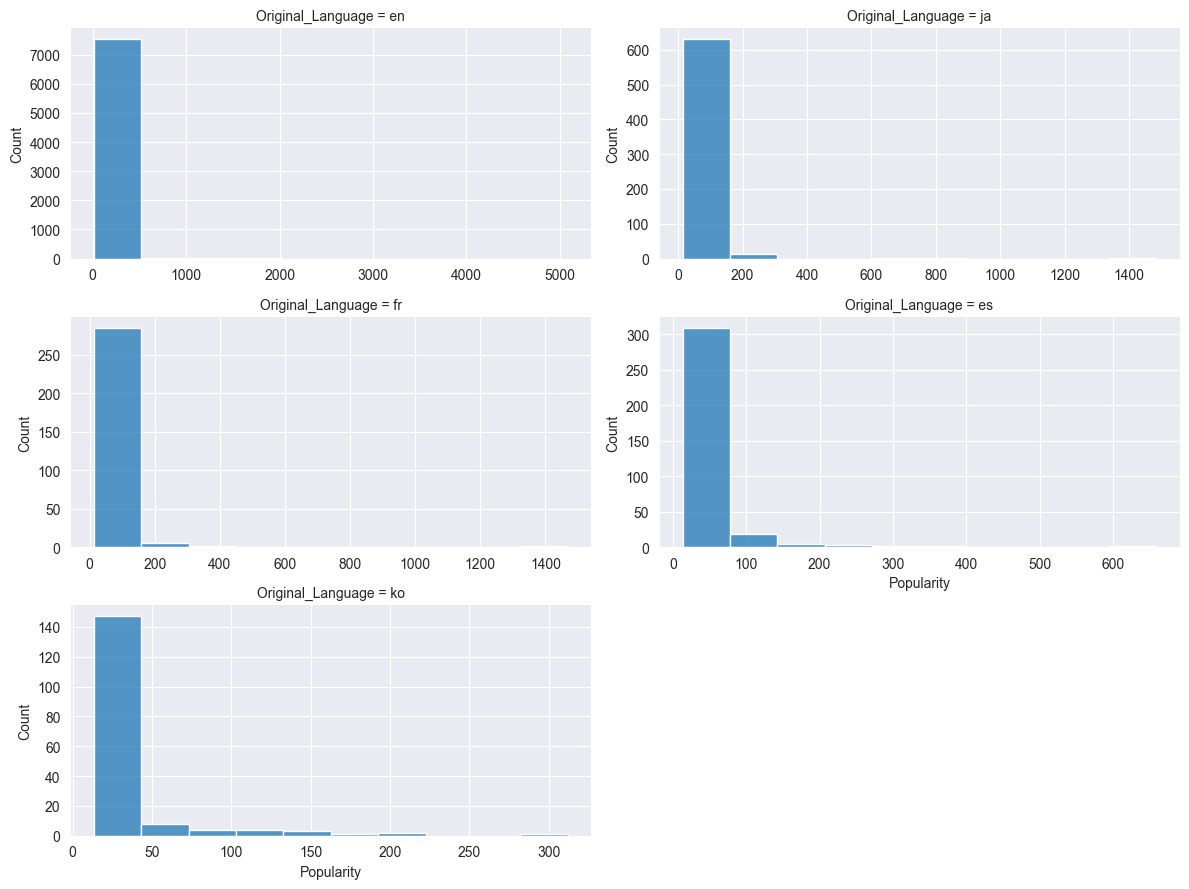

In [24]:
tmp = df[df["Original_Language"].isin(["en", "es", "fr", "ja", "ko"])]
g = sns.FacetGrid(
    tmp, col="Original_Language", aspect=2, col_wrap=2, sharey=False, sharex=False
)
g.map(sns.histplot, "Popularity", bins=10)

English movies are the most popular but korean ones are the least in the top 5


# Vote_Count


In [25]:
df["Vote_Count"] = df["Vote_Count"].astype(float)

In [26]:
df["Vote_Count"].value_counts()

Vote_Count
0.0       100
4.0        38
2.0        34
3.0        31
5.0        31
         ... 
9124.0      1
1153.0      1
4698.0      1
3692.0      1
1319.0      1
Name: count, Length: 3266, dtype: int64

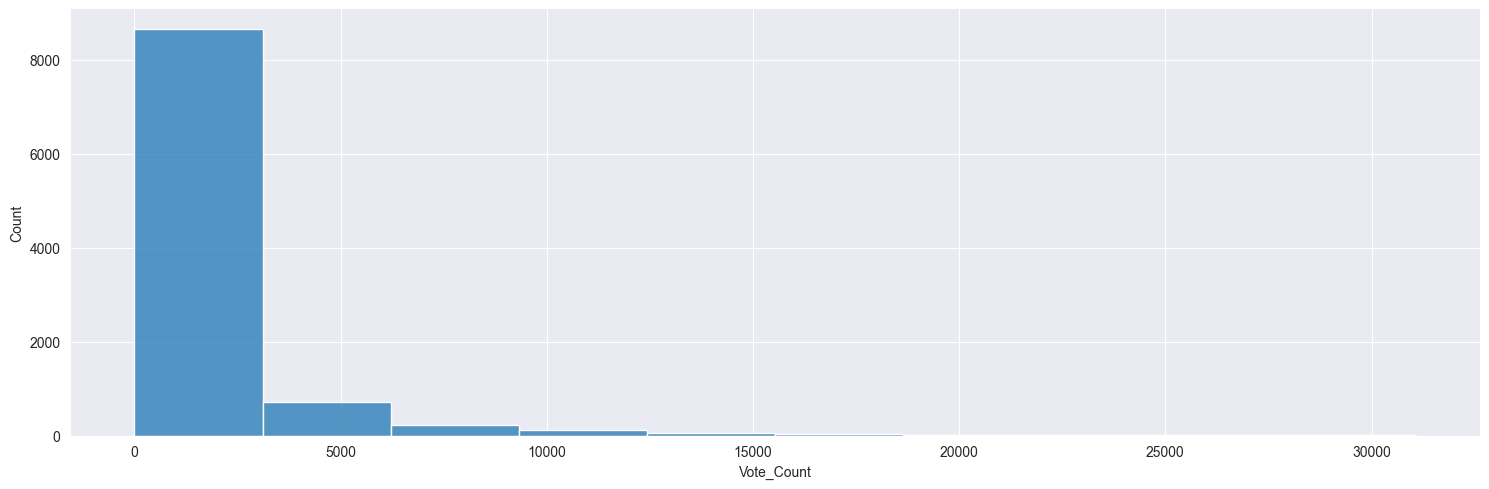

In [27]:
sns.displot(df["Vote_Count"], bins=10, aspect=3)

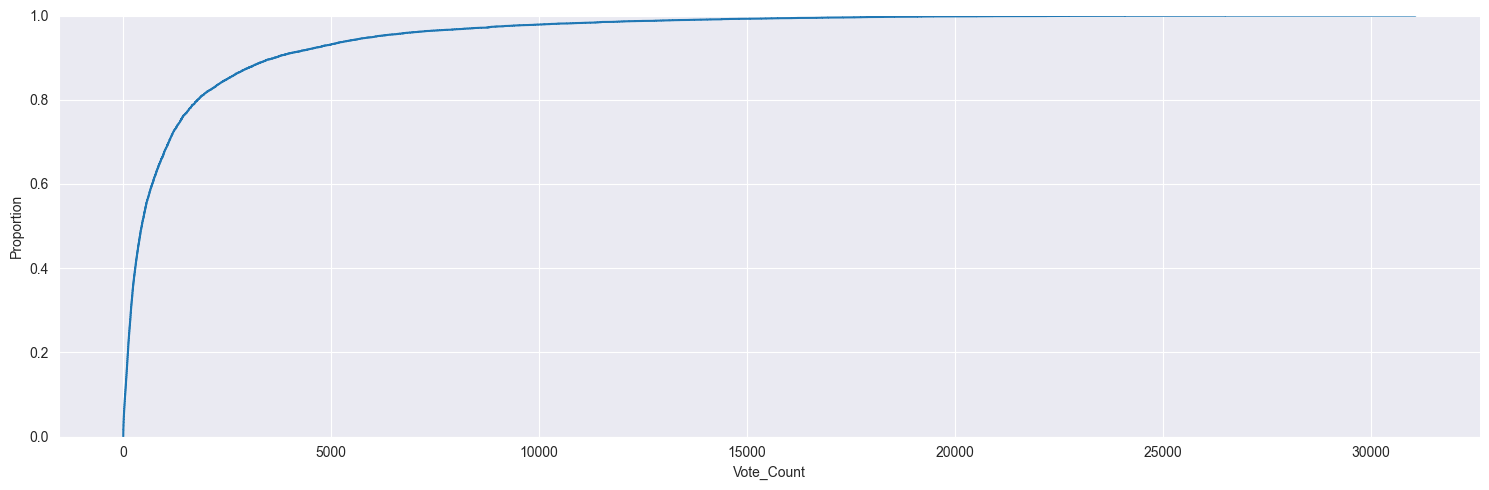

In [28]:
sns.displot(df["Vote_Count"], kind="ecdf", aspect=3)

About 95% of the instances are up to 5000 votes


<Axes: xlabel='Vote_Count', ylabel='Popularity'>

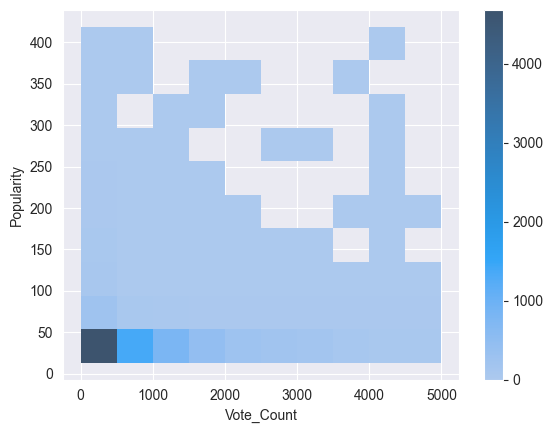

In [29]:
tmp = df[(df["Vote_Count"] < 5000) & (df["Popularity"] < 500)]
sns.histplot(
    x="Vote_Count",
    y="Popularity",
    data=tmp,
    bins=10,
    cbar=True,
)

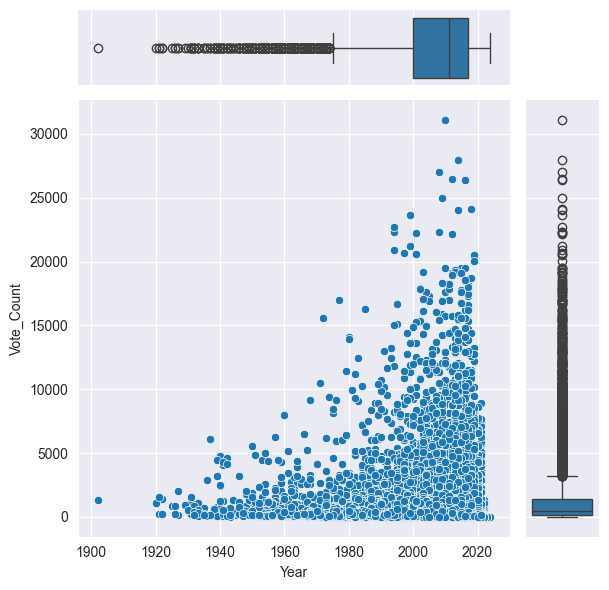

In [30]:
g = sns.JointGrid(y="Vote_Count", x="Year", data=df)
g.plot(sns.scatterplot, sns.boxplot)

In [31]:
most_vote = (
    df[["Title", "Vote_Count"]].sort_values(by="Vote_Count", ascending=False).head(20)
)
most_vote

,Title,Vote_Count
380,Inception,31077.0
461,Interstellar,27975.0
221,The Dark Knight,26994.0
138,The Avengers,26490.0
195,Deadpool,26390.0
92,Avatar,25011.0
71,Avengers: Infinity War,24079.0
1223,Guardians of the Galaxy,24024.0
407,Fight Club,23620.0
1312,Pulp Fiction,22733.0


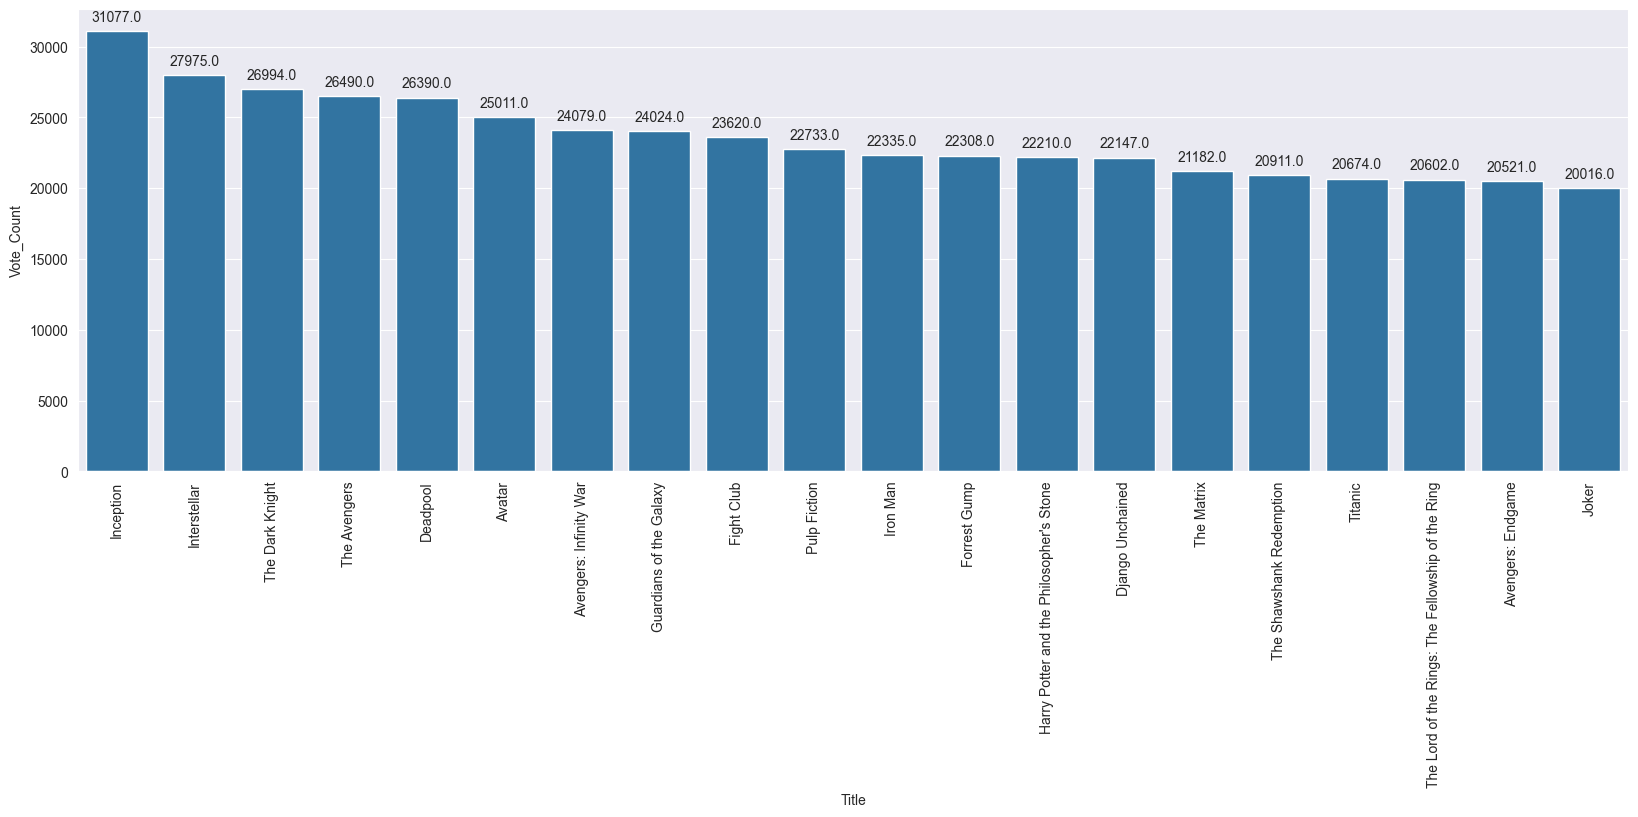

In [32]:
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=most_vote["Title"], y=most_vote["Vote_Count"])
plt.xticks(rotation=90)
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(
        f"{height}",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        va="bottom",
    )

most voted movies:

1. Inception
2. Interstellar
3. The Dark Knight


- Recent films `2000-2024` have the most vote_counts, maybe because they have marketing campaign and advertisements


# Vote Average


In [33]:
df["Vote_Average"] = df["Vote_Average"].astype(float)

In [34]:
df.Vote_Average.value_counts().sort_index()

Vote_Average
0.0     100
1.5       1
1.8       1
2.0      18
2.2       1
       ... 
8.9       3
9.0       4
9.1       2
9.2       1
10.0      1
Name: count, Length: 74, dtype: int64

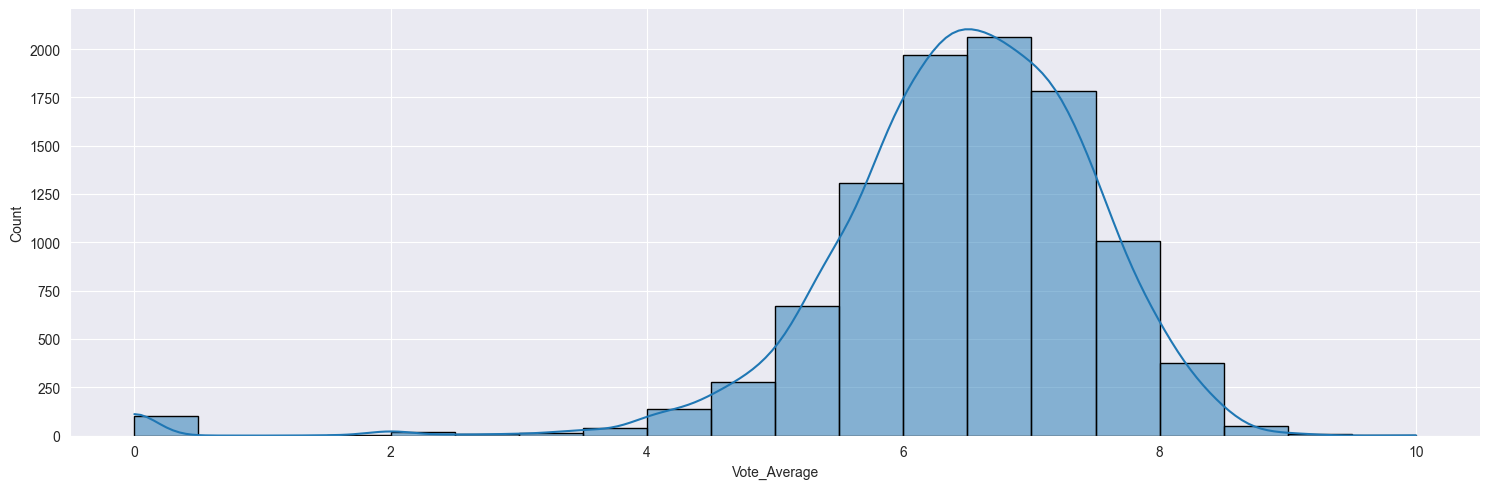

In [35]:
sns.displot(
    x="Vote_Average",
    data=df,
    kind="hist",
    aspect=3,
    bins=20,
    binrange=(0, 10),
    kde=True,
    edgecolor="black",
)

Most movies have `6 - 8` rating


<Axes: xlabel='Density', ylabel='Popularity'>

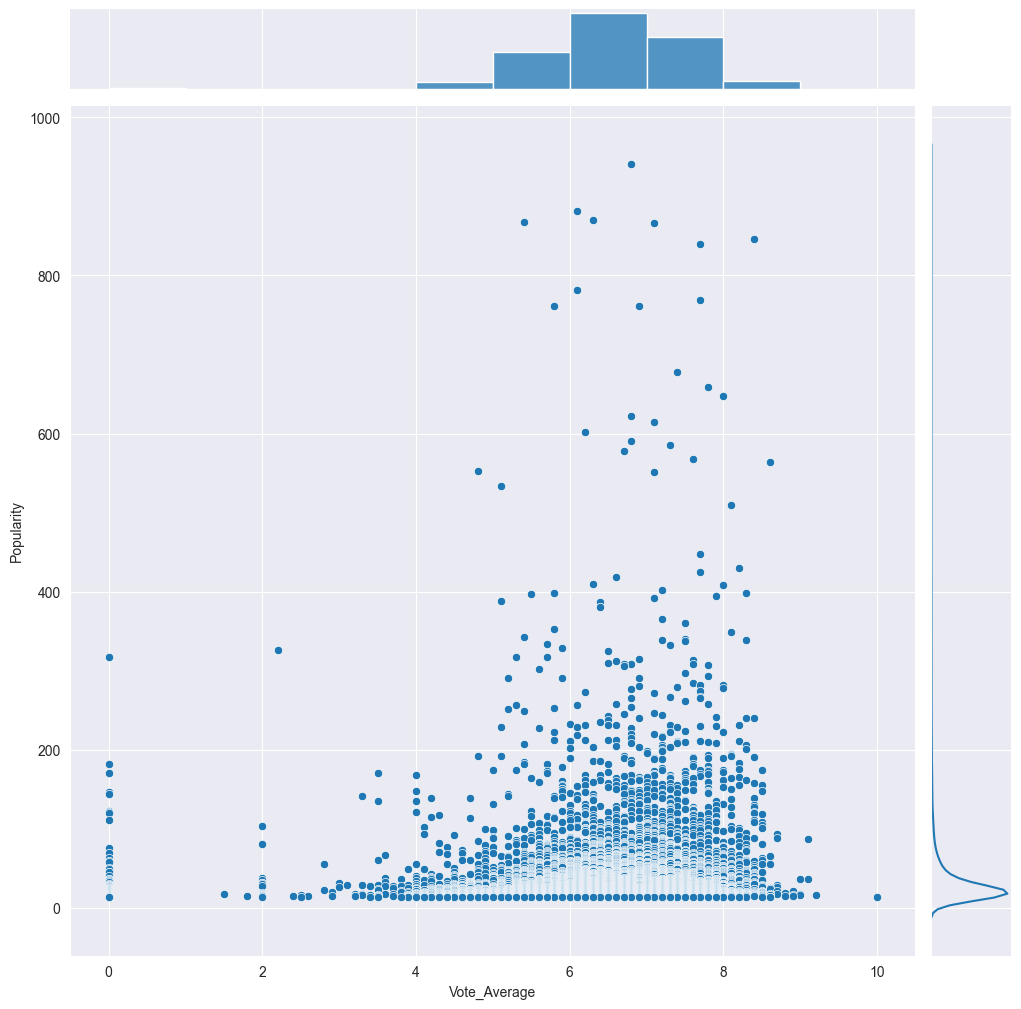

In [36]:
tmp = df[df["Popularity"] < 1000]
g = sns.JointGrid(ratio=9, height=10)
sns.scatterplot(y="Popularity", x="Vote_Average", data=tmp, ax=g.ax_joint)
sns.histplot(x="Vote_Average", data=tmp, bins=10, cbar=True, ax=g.ax_marg_x)
sns.kdeplot(y="Popularity", data=tmp, ax=g.ax_marg_y)

Popularity seems to have a relation with the Vote_avg, maybe many people choose films with high rating to watch them so they get more popular


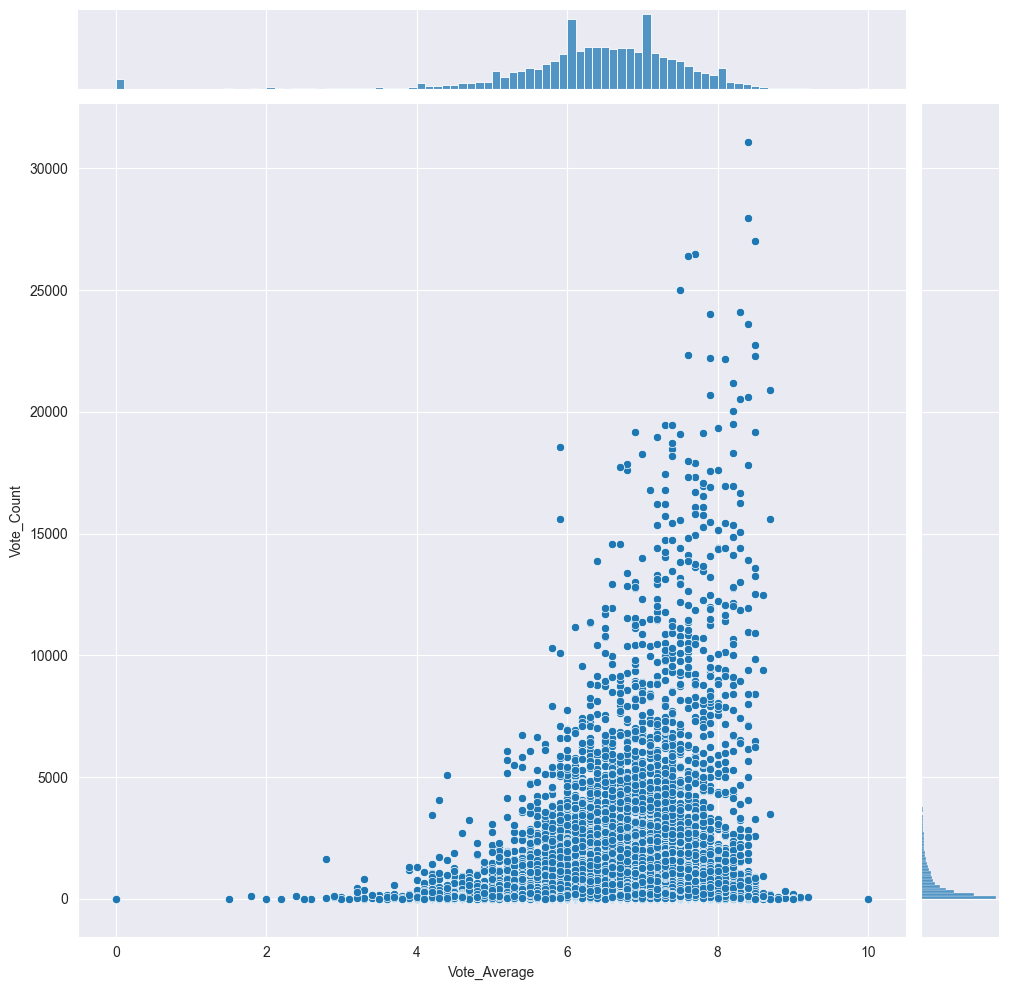

In [37]:
g = sns.JointGrid(x="Vote_Average", y="Vote_Count", data=df, ratio=9, height=10)
g.plot(sns.scatterplot, sns.histplot)

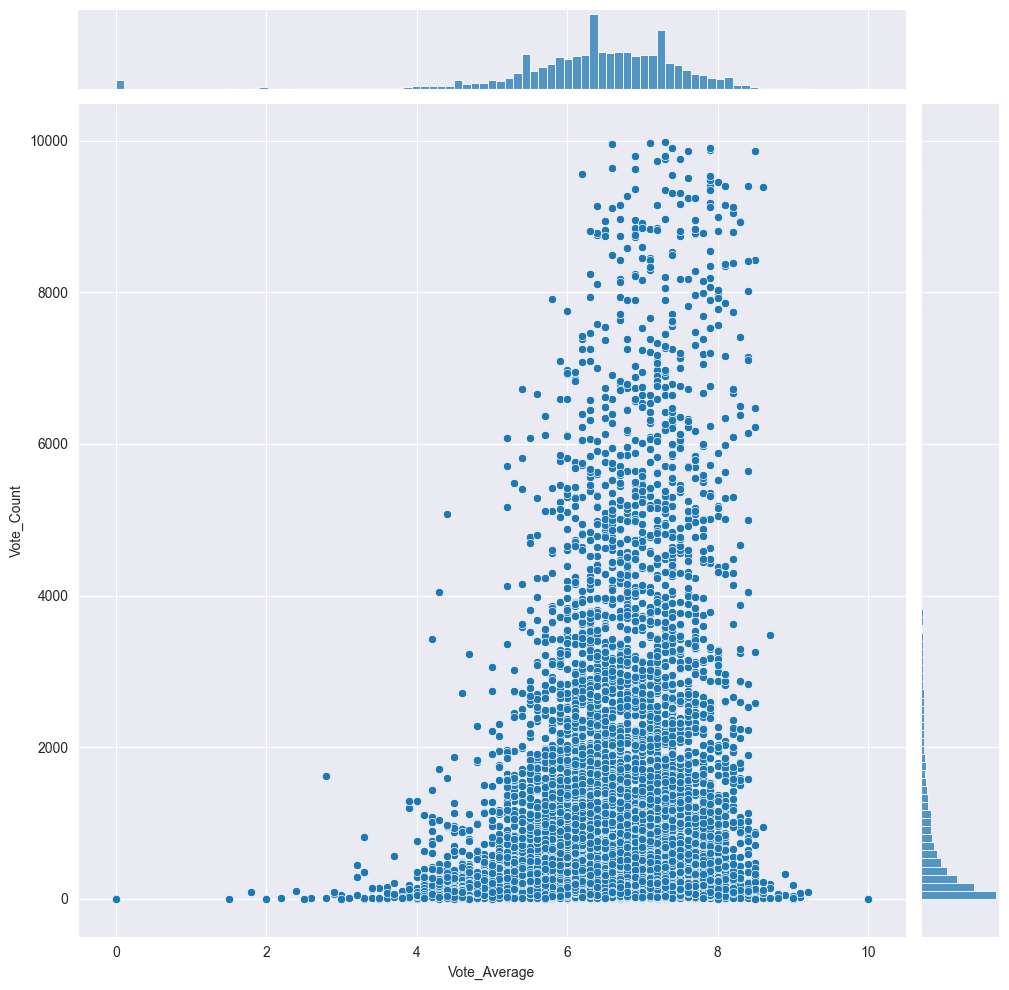

In [38]:
tmp = df[df["Vote_Count"] < 10000]
g = sns.JointGrid(x="Vote_Average", y="Vote_Count", data=tmp, ratio=9, height=10)
g.plot(sns.scatterplot, sns.histplot)

- Vote_Count has a strong relation with the Vote_Avg.
- Films with `0` rating just have no votes yet.


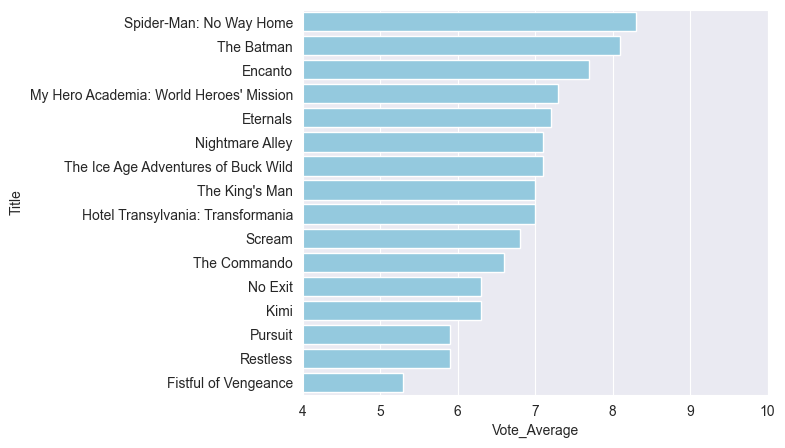

In [39]:
fig, ax = plt.subplots(figsize=(6, 5))

to_plot = df.loc[:15, ["Vote_Average", "Title"]]
to_plot = to_plot.sort_values(by="Vote_Average", ascending=False)
sns.barplot(y=to_plot["Title"], x=to_plot["Vote_Average"], color="skyblue")


plt.yticks(fontsize=10)
plt.xlim([4, 10])
plt.show()

# Original Language


In [40]:
df["Original_Language"].value_counts()

Original_Language
en    7570
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
pt      37
da      28
no      26
hi      26
sv      23
nl      21
pl      17
th      17
id      15
tr      15
tl       8
te       6
el       5
fi       5
sr       5
cs       4
fa       3
hu       3
is       2
ro       2
uk       2
ta       2
ar       2
he       2
ca       1
la       1
nb       1
bn       1
ms       1
lv       1
eu       1
ml       1
et       1
Name: count, dtype: int64

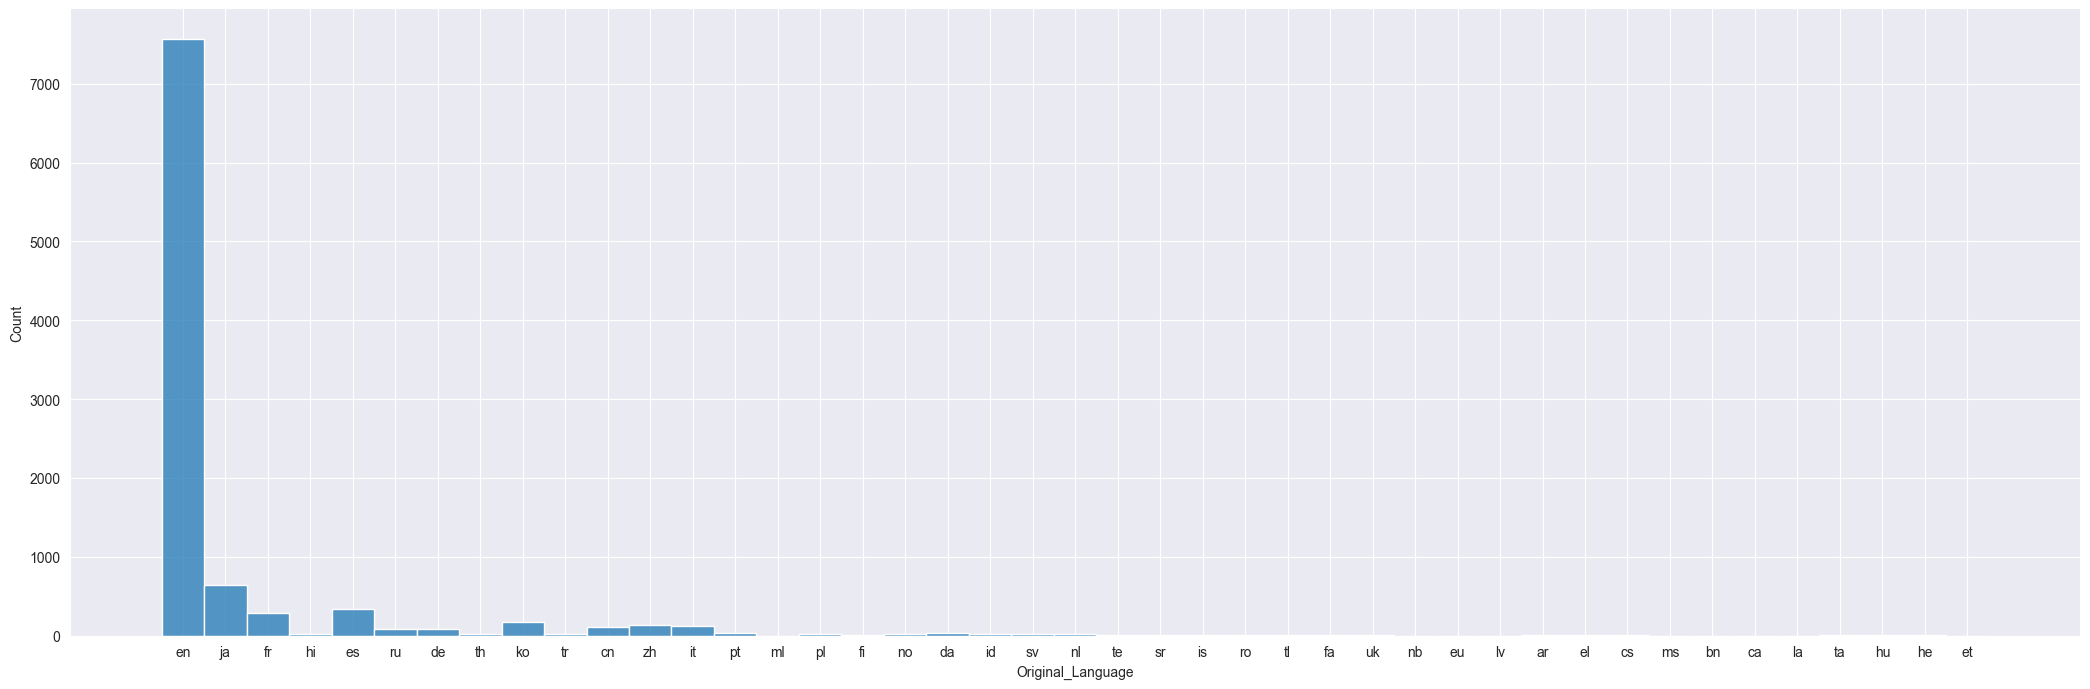

In [41]:
sns.displot(data=df, x="Original_Language", kind="hist", aspect=3, height=7)

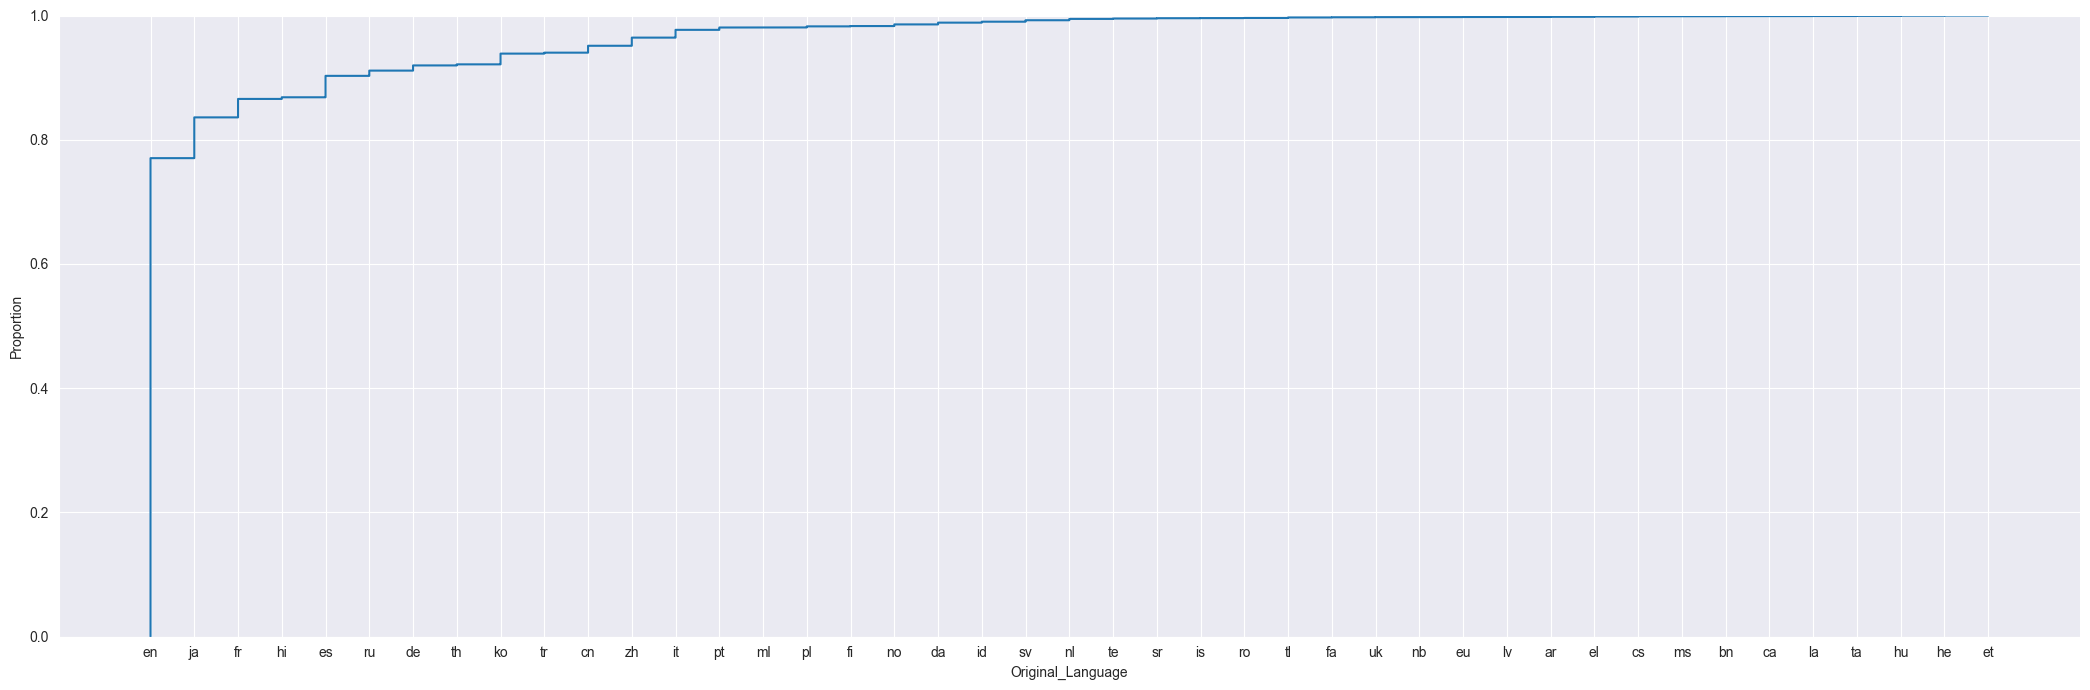

In [42]:
sns.displot(data=df, x="Original_Language", kind="ecdf", aspect=3, height=7)

# Genre


In [43]:
df["Genre"].value_counts()

Genre
Drama                                            466
Comedy                                           403
Drama, Romance                                   248
Horror                                           238
Horror, Thriller                                 199
                                                ... 
Drama, Horror, Thriller, Science Fiction           1
Action, Science Fiction, Animation, Adventure      1
Comedy, Fantasy, Horror, Science Fiction           1
Drama, Science Fiction, Animation                  1
War, Drama, Science Fiction                        1
Name: count, Length: 2337, dtype: int64

In [44]:
df["Genre"] = df["Genre"].str.strip().str.split(",")

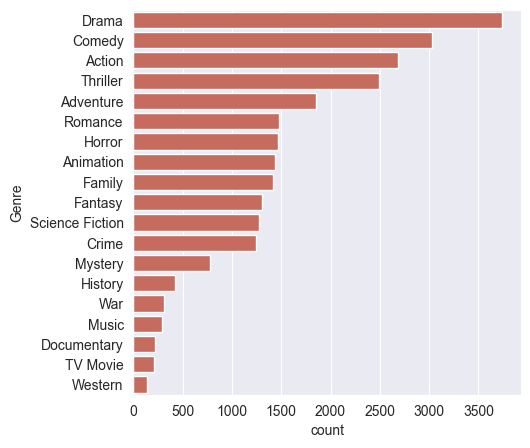

In [45]:
fig, ax = plt.subplots(figsize=(5, 5))
new_df = df.explode("Genre")

new_df["Genre"] = new_df["Genre"].str.strip()

new_df["Genre"]
sns.countplot(
    y="Genre", data=new_df, order=new_df["Genre"].value_counts().index, color="#d6604d"
)
plt.yticks(fontsize=10)
plt.show()

_`Drama` is the most popular genre_
